# Decision Tree on Iris Dataset

# Table of Content
<hr style="height:2px">

## [ 1.WorkFlow](#wf)

## [ 2. What is Decision Tree?](#km)

## [3.Importing Library](#il)

##  [4.Loading Dataset ](#ld)

## [5. Visualizing Data](#vd)

## [6. Model Creation and Fitting](#mc)

## [7. Evaluation](#e)

## [8.Plotting Decision Tree Graph](#p)
<hr style='height:2px'>

# 1. WorkFlow

## Iris Data ---> Preprocessing --->Exploring ---> Building Model ---> Evaluation->Decision Tree Graph Plotting

# 2. What is Decision Tree ?

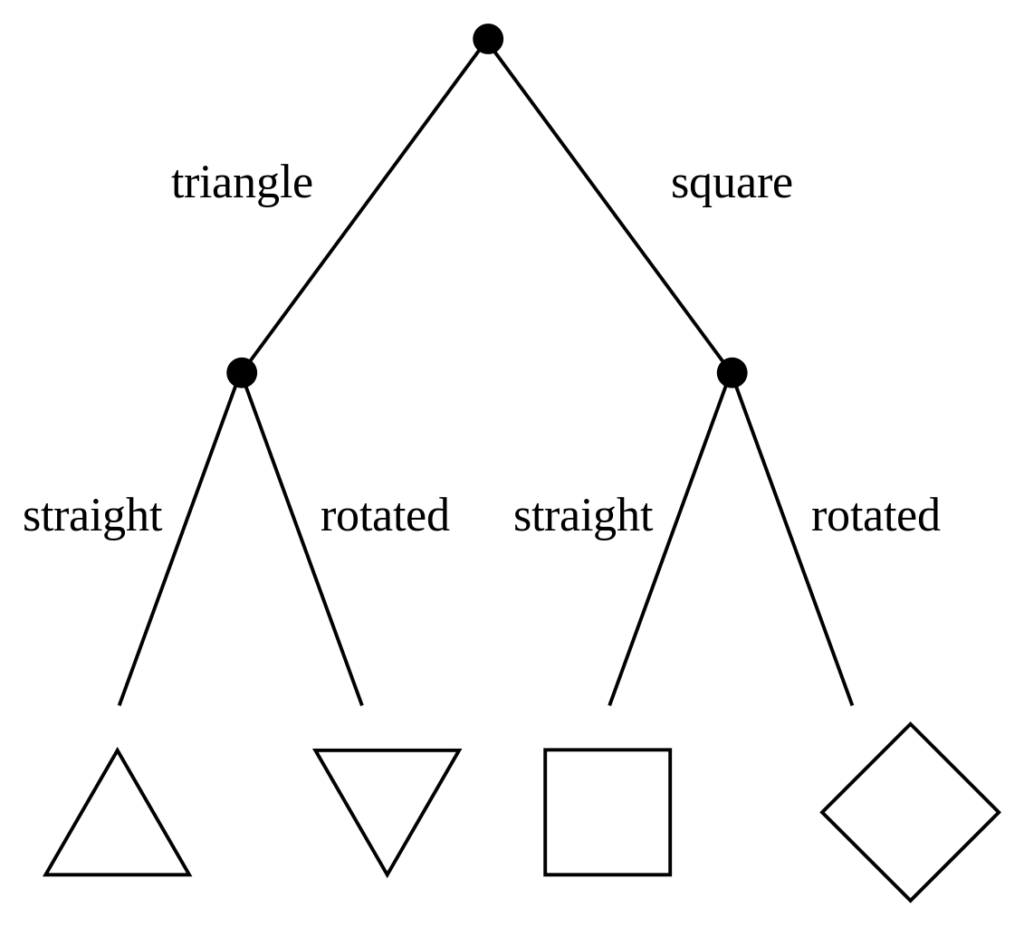 

- ##  A decision tree is a diagram or chart that helps determine a course of action or show a statistical probability. 
- ## Starting from the decision itself (called a "node"), each "branch" of the decision tree represents a possible decision, outcome, or reaction.

- ## Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter.
- ## An example of a decision tree can be explained using above binary tree.

# This is how Iris Versicolor / Setosa / Virgnica looks like:

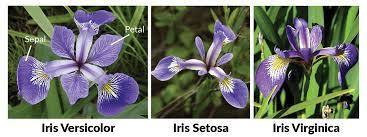

# 3. Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

# 4. Loading Dataset

In [2]:
dataframe=pd.read_csv("../input/iris/Iris.csv")

In [3]:
dataframe.shape

(150, 6)

In [4]:
dataframe.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataframe.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
dataframe['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
del dataframe['Id']

In [8]:
dataframe

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
dataframe.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 5. Visualization of Data

- ### Checking for Null values 

In [11]:
sum(dataframe["SepalLengthCm"].isnull())

0

In [12]:
sum(dataframe["PetalLengthCm"].isnull())

0

In [13]:
sum(dataframe["PetalWidthCm"].isnull())

0

In [14]:
sum(dataframe["SepalWidthCm"].isnull())

0

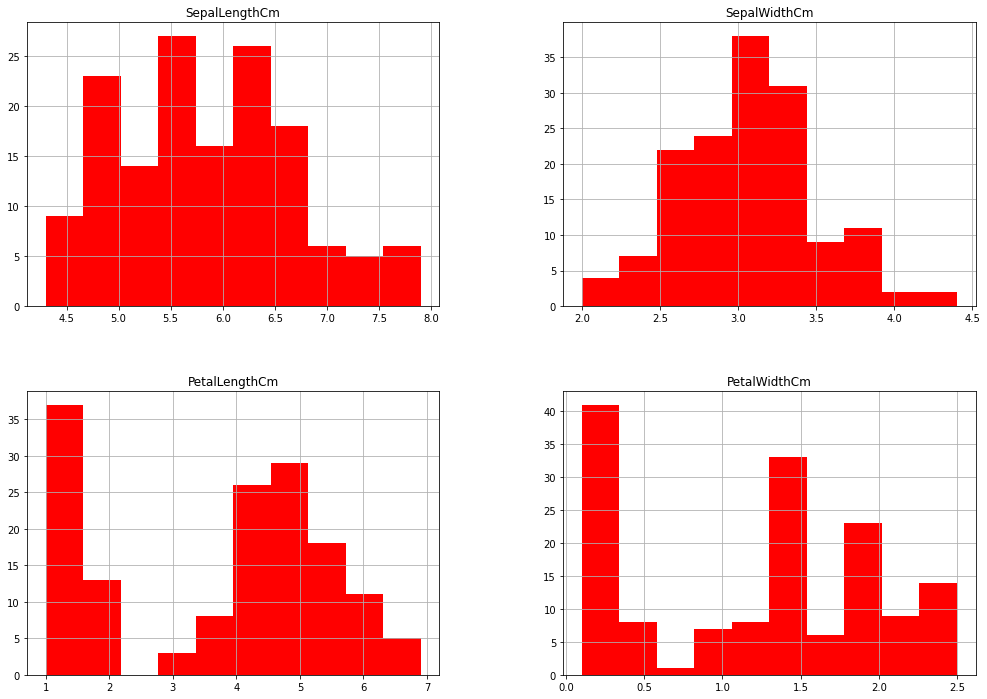

In [15]:
# Histogram of the dataset 

dataframe.hist(figsize=(17,12),color='r')
plt.show()

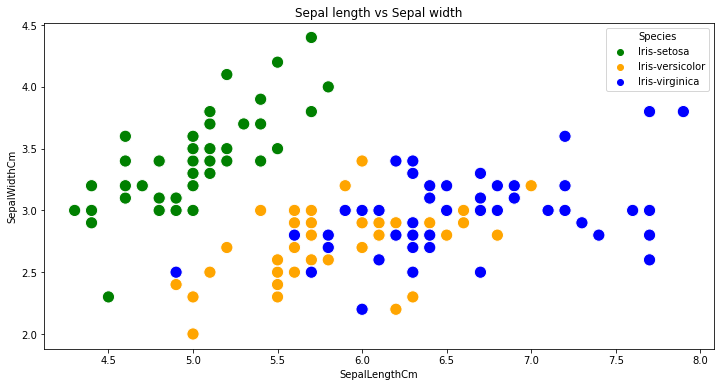

In [16]:
# ScatterPLot of Sepal length vs Sepal width

plt.figure(figsize=(12,6))
plt.title("Sepal length vs Sepal width")
sns.scatterplot(x=dataframe["SepalLengthCm"],
                y=dataframe["SepalWidthCm"],
                hue=dataframe["Species"],
                palette=["green","orange","blue"],
                s=150)
plt.show()

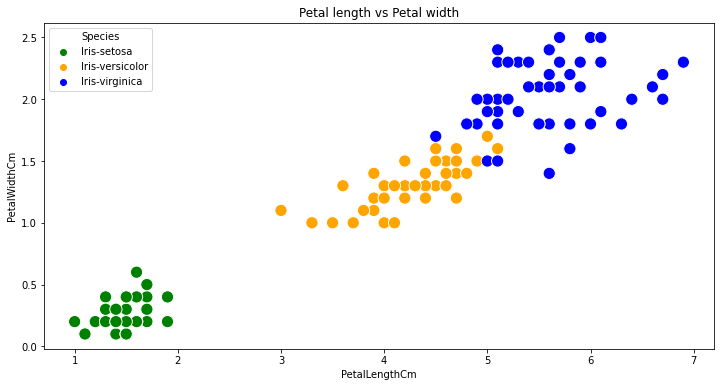

In [17]:
# ScaterPlot of Petal length vs Petal width

plt.figure(figsize=(12,6))
plt.title("Petal length vs Petal width")
sns.scatterplot(x=dataframe["PetalLengthCm"],
                y=dataframe["PetalWidthCm"],
                hue=dataframe["Species"],
                palette=["green","orange","blue"],
                s=150)
plt.show()

## Creating and Plotting Correlation Matrix

In [18]:
corr=dataframe.corr()

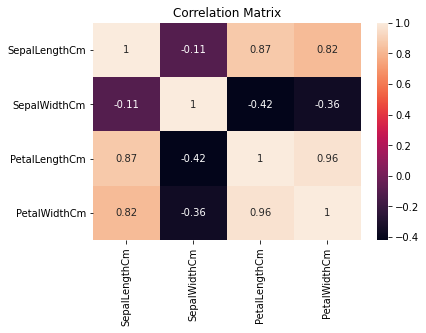

In [19]:
sns.heatmap(dataframe.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

##  What is boxplot?
- ### A box and whisker plot is a way of summarizing a set of data measured on an interval scale. It is often used in explanatory data analysis. This type of graph is used to show the shape of the distribution, its central value, and its variability.

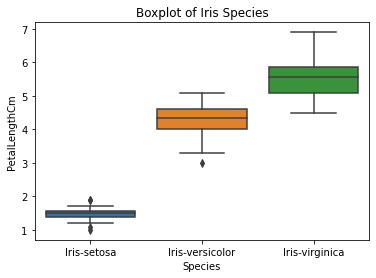

In [20]:
sns.boxplot(x="Species", y="PetalLengthCm", data=dataframe)
plt.title('Boxplot of Iris Species')
plt.show()

### Now let us see how the length and width vary according to the species

## What is Violinplot ?
- ### A violin plot is a method of plotting numeric data. It is similar to a box plot, with the addition of a rotated kernel density plot on each side. Violin plots are similar to box plots, except that they also show the probability density of the data at different values, usually smoothed by a kernel density estimator.

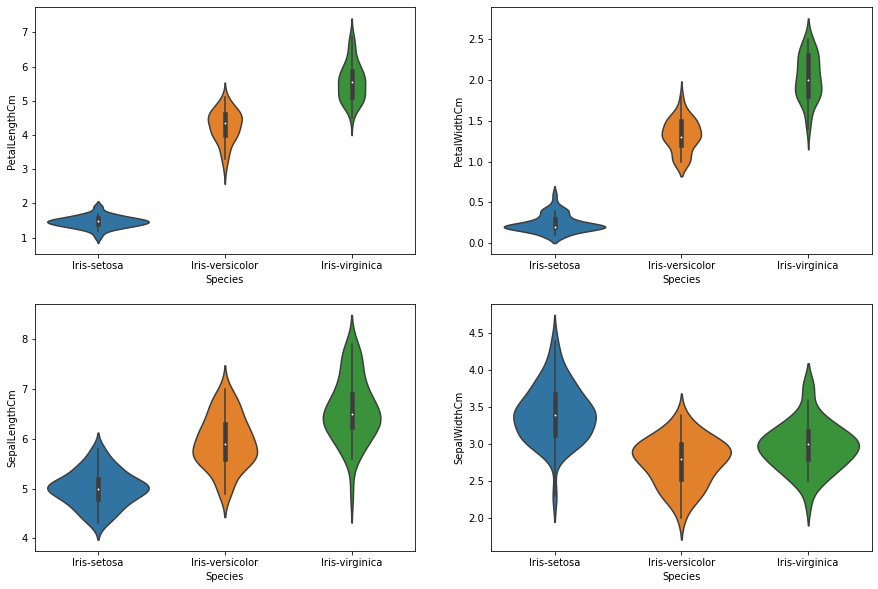

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=dataframe)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=dataframe)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=dataframe)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=dataframe)
plt.show()

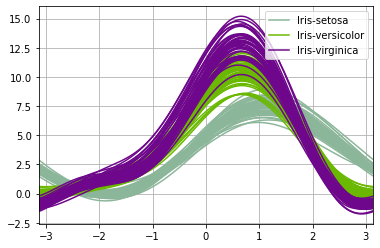

In [22]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
pd.plotting.andrews_curves(dataframe, "Species")
plt.show()

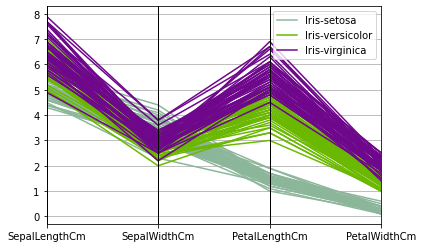

In [23]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
pd.plotting.parallel_coordinates(dataframe, "Species")
plt.show()

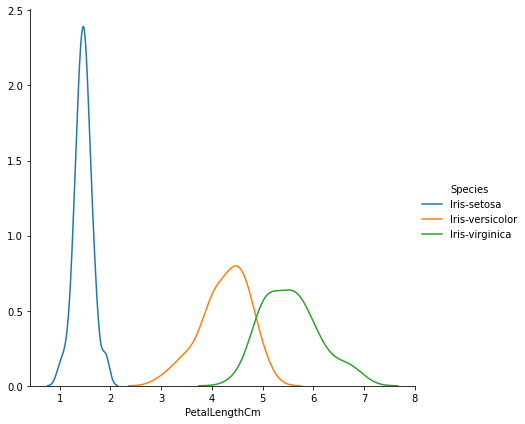

In [24]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(dataframe, hue="Species", height=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

# 6. Building Decision Tree Classifer

- ## But first Split our data into Training and Testing 

In [25]:
X=dataframe[["SepalLengthCm","SepalWidthCm",'PetalLengthCm','PetalWidthCm']]

In [26]:
y=dataframe[["Species"]]

In [27]:
X.shape

(150, 4)

In [28]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
y.shape

(150, 1)

In [30]:
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


#### Here we are splittting our data using train_test_split() 

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
X_train.shape

(120, 4)

In [33]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
50,7.0,3.2,4.7,1.4
31,5.4,3.4,1.5,0.4
101,5.8,2.7,5.1,1.9
47,4.6,3.2,1.4,0.2
121,5.6,2.8,4.9,2.0
...,...,...,...,...
68,6.2,2.2,4.5,1.5
87,6.3,2.3,4.4,1.3
41,4.5,2.3,1.3,0.3
115,6.4,3.2,5.3,2.3


In [34]:
X_test.shape

(30, 4)

In [35]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
67,5.8,2.7,4.1,1.0
23,5.1,3.3,1.7,0.5
55,5.7,2.8,4.5,1.3
108,6.7,2.5,5.8,1.8
141,6.9,3.1,5.1,2.3
56,6.3,3.3,4.7,1.6
44,5.1,3.8,1.9,0.4
36,5.5,3.5,1.3,0.2
89,5.5,2.5,4.0,1.3
105,7.6,3.0,6.6,2.1


In [36]:
y_train.shape

(120, 1)

In [37]:
y_train

,Species
50,Iris-versicolor
31,Iris-setosa
101,Iris-virginica
47,Iris-setosa
121,Iris-virginica
...,...
68,Iris-versicolor
87,Iris-versicolor
41,Iris-setosa
115,Iris-virginica


In [38]:
y_test.shape

(30, 1)

In [39]:
y_test

,Species
67,Iris-versicolor
23,Iris-setosa
55,Iris-versicolor
108,Iris-virginica
141,Iris-virginica
56,Iris-versicolor
44,Iris-setosa
36,Iris-setosa
89,Iris-versicolor
105,Iris-virginica


- ## Building Decision Tree Classifier  

In [40]:
dtc=DecisionTreeClassifier()

In [41]:
dtc

DecisionTreeClassifier()

In [42]:
type(dtc)

sklearn.tree._classes.DecisionTreeClassifier

In [43]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
y_predict=dtc.predict(X_test)

In [45]:
y_predict

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [46]:
print(len(y_predict))

30


# 7. Evaluation

In [47]:
a=accuracy_score(y_predict,y_test)

print('Accuracy Score=',a*100,'%')

Accuracy Score= 93.33333333333333 %


In [48]:
c=confusion_matrix(y_predict,y_test)

print(c)

[[14  0  0]
 [ 0  7  2]
 [ 0  0  7]]


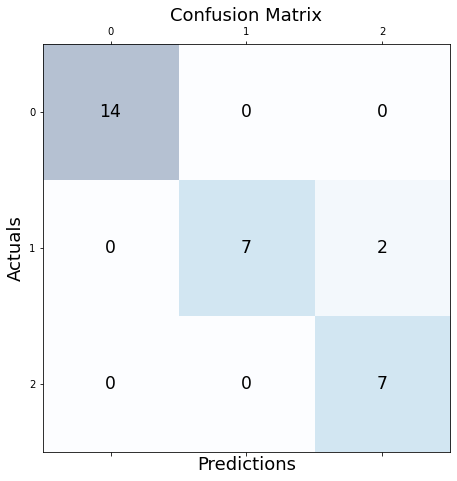

In [49]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(c, cmap=plt.cm.Blues, alpha=0.3)
for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        ax.text(x=j, y=i,s=c[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# 8. Plotting Decision Tree Graph

In [50]:
pip install pydotplus

     |████████████████████████████████| 278 kB 2.1 MB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=ef1b51118ef882d81b6f5beacde2414db6266c1137e6272eed974b703eebabc9
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [51]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

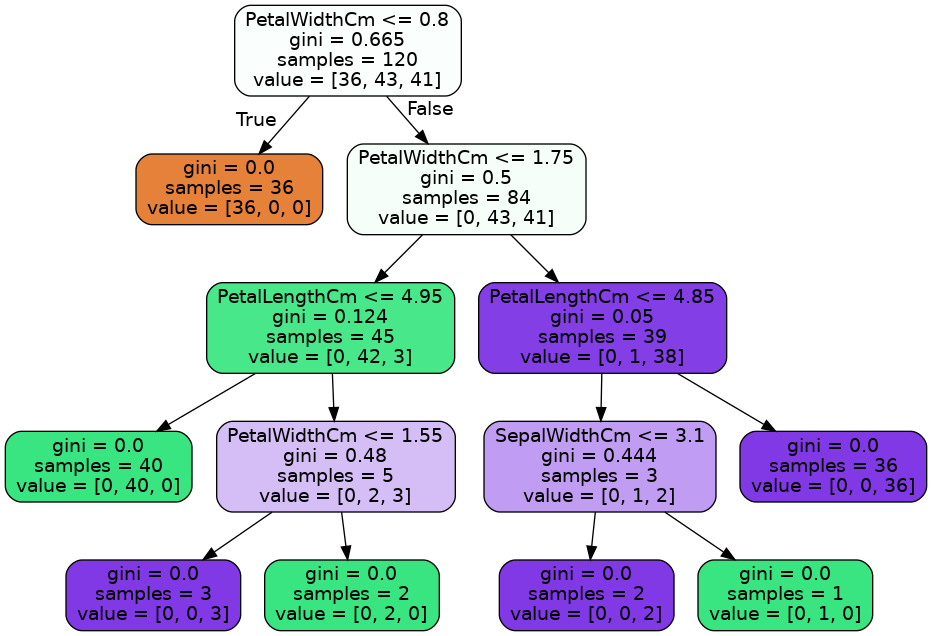

In [52]:
dot_data=StringIO()
export_graphviz(dtc,out_file=dot_data,feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],
                filled=True,
                rounded=True)
               
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())